In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")
%matplotlib inline

sns.set()

In [2]:
#using read_csv function to import the databases
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(f' train shape: {train.shape}')

 train shape: (1460, 81)


### Correlation

In [5]:
#Looking for the correlation between variables
corr = train.corr()

corr.SalePrice.sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

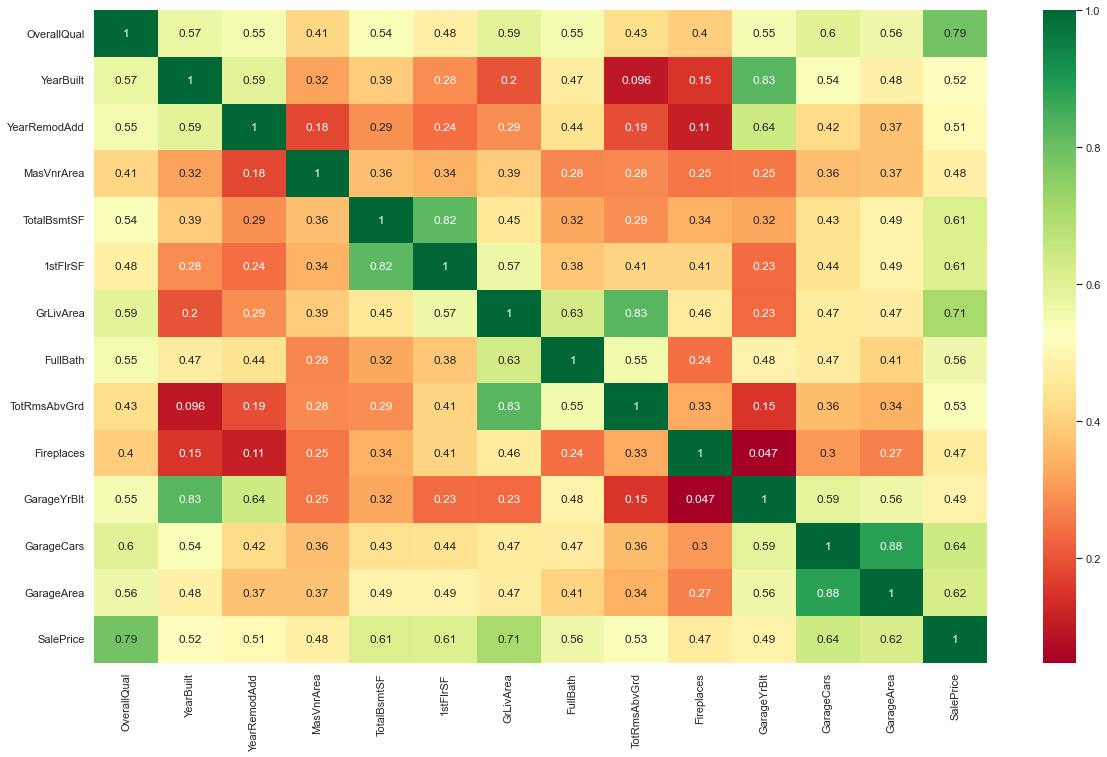

In [6]:
corr = train.corr()
variables = corr.index[abs(corr["SalePrice"]) > 0.46]
plt.figure(figsize = (20,12))
heatmap = sns.heatmap(train[variables].corr(),annot=True,cmap="RdYlGn")

In [7]:
#send heatmap to an heatmap.png

fig = heatmap.get_figure()
fig.savefig("../static/images/heatmap_not.png") 

After looking to the correlation to the training dataset we can have a thought on what variables we must use. With this results first we will make an analysis with the numerical variables with a correlation higher than .46 

 ## Skewness - Data Distribution - Outliers-

For all the numerical variables that we have choosen it is necessary to see the distribution of the data in order to be able to check if there are columns with skew to the right or left or if they have a normal distribution, so it would be best to graph them through histograms. Also we need to see the interaction between  our target variable against the others so we will display a correlation heatmap to see the results that we need a choose the best variables to work with

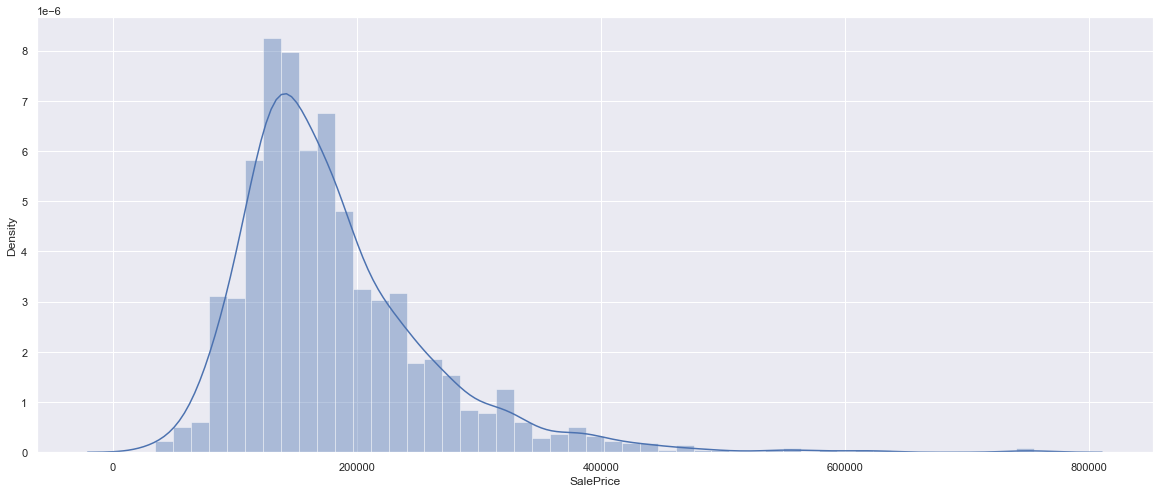

In [8]:
sns.set_theme()
plt.figure(figsize=(20,8))
skew = sns.distplot(train['SalePrice'],kde=True);

In [9]:
train.SalePrice.skew()

1.8828757597682129


As we can see, it is skewed to the right which it means that there is a higher probability that there are extreme positive values to the right and we would have to use the median to describe the central tendency of the data. In order to chande this we will use natural logarithm to modify the skewness

In [10]:
#send skew to an skew.png

fig = skew.get_figure()
fig.savefig("../static/images/skew_not.png") 

In [11]:
train.SalePrice = np.log1p(train.SalePrice)

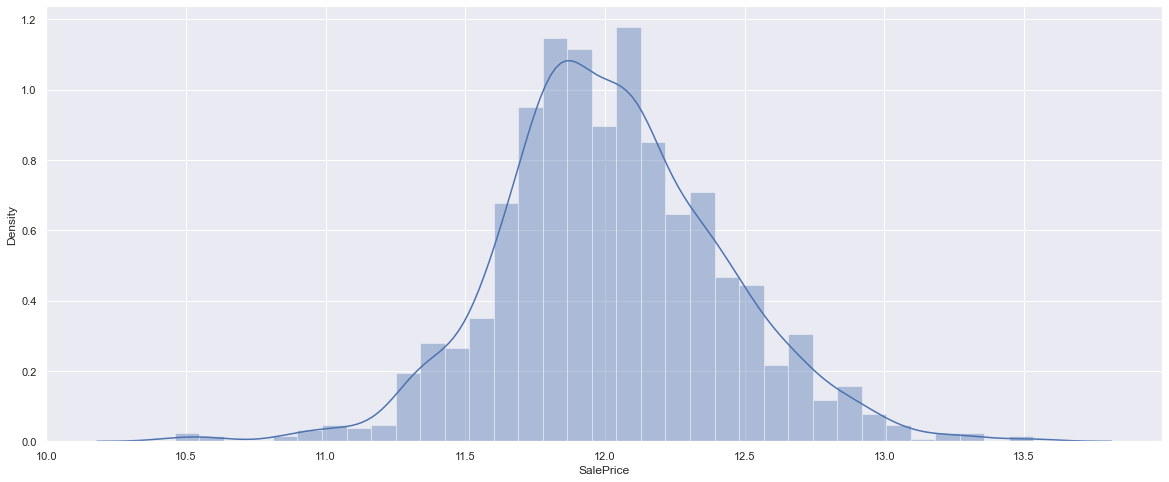

In [12]:
#Plot again the SalePrice variable to see the changes
plt.figure(figsize=(20,8))
normal = sns.distplot(train.SalePrice, kde= True);

In [13]:
train.SalePrice.skew()

0.12134661989685329

In [14]:
#send skew to an skew.png

fig = normal.get_figure()
fig.savefig("../static/images/normal_not.png") 